# Caldera Analytics Challenge 

## Submitted by: Shashank Sharma


# Introduction

My approach to this challenge in breifly exlpained in chronological order below:

* <b>Data cleaning and exploration:</b> Removing the outliers and preparing the dataset for analysis by coverting categorical variables to continuous variables. Understanding the data and finding collinearities within features. 

* <b>Feature reduction:</b> The features that ar highly correlated or add no value to predicting the target variable are removed. Recursive feature elimination method with cross-validation (RFECV) and Pearson correlation are used to perform feature reduction.
* <b>Modelling using Grid Search cross validation for parameter optimisation:</b> Random forest regressor is used to fit a regression line to predict the target variable with the selected features. Grid Search cross validation is used to find the optimal set of parameters for the model.
* <b>Understanding the model:</b> SHAP values are used to observe the importance of each feature in the model.
* <b>Final Model:</b> 5 most important features in the model are used to build a new optmized and efficient model.

In [81]:
#######################################
####Importing required libraries#######
#######################################

import pandas as pd  #to manipulate databses 
import matplotlib.pyplot as plt #to visualize data
import seaborn as sn #to visualize data
import numpy as np #to create linspace sequences
from fuzzywuzzy import fuzz #to check similarity in feature names
from sklearn.ensemble import RandomForestRegressor #To build the model
from sklearn.feature_selection import RFECV #for recursive feature elimination
from sklearn.model_selection import train_test_split #To split test and training data
from sklearn.model_selection import GridSearchCV #For cross-validating to find the optimal set of parameters
from sklearn.pipeline import Pipeline #for pipelining processes
from sklearn.metrics import r2_score  #to calculate the r2 error value in the predicted and true labels
import shap #to evaluate feature importance 
import warnings # to ignore warnings


In [82]:
#ignoring the warnings
warnings.filterwarnings('ignore')

In [83]:
#loading the dataset
df = pd.read_csv('dataset.csv')
df.head()

,collar_id,actual_depth,geometry,zone,TMI_pointval,TMI_VRTP_pointval,TMI_VRTP_1VD_pointval,LP800_pointval,LP800_AS_pointval,LP800_VRTP_pointval,...,TMI_VRTP_UC1000_ERS_mean_10kmradius,TMI_VRTP_UC1000_ERS_median_10kmradius,TMI_VRTP_UC1000_ERS_min_dist_10kmradius,TMI_VRTP_UC1000_ERS_max_dist_10kmradius,TMI_VRTP_UC1000_RES_ERS_max_10kmradius,TMI_VRTP_UC1000_RES_ERS_min_10kmradius,TMI_VRTP_UC1000_RES_ERS_mean_10kmradius,TMI_VRTP_UC1000_RES_ERS_median_10kmradius,TMI_VRTP_UC1000_RES_ERS_min_dist_10kmradius,TMI_VRTP_UC1000_RES_ERS_max_dist_10kmradius
0,5001.0,37.999959,POINT (134.155953163 -29.945266969),cooper,-20.657303,-130.891296,-0.229694,-5.389102,0.462697,-100.814095,...,-336.251221,-355.230896,4.953328,5.015879,580.988220,-361.021790,9.272087,8.083633,5.024035,0.895279
1,5003.0,3.999978,POINT (134.392053039 -29.663745938),cooper,-294.125580,-422.649902,-0.246283,-289.429901,0.254471,-416.985107,...,-302.756042,-307.414001,4.957142,2.397101,676.830688,-249.721802,-2.767445,-35.579651,3.822934,2.204078
2,5008.0,24.000040,POINT (134.366706477 -29.54774911700001),cooper,-371.238098,-394.997284,-0.162983,-363.586212,0.121357,-387.191223,...,-316.071960,-316.103638,4.981700,2.380952,368.955505,-86.521973,-20.871996,-29.432526,4.997480,3.940378
3,5051.0,37.999999,POINT (134.478686025 -29.254672033),cooper,207.702240,-373.098907,-1.761442,231.137390,1.542597,-317.548889,...,706.808228,736.730164,5.000157,2.698704,6166.598633,-1186.350830,161.437515,-60.420532,3.138937,2.218321
4,5055.0,215.999990,POINT (134.076614 -29.44939248999999),cooper,-793.442810,-240.964081,-0.070106,-793.235413,0.089193,-250.662613,...,-134.250107,-198.992126,4.889821,4.990225,153.214630,-100.810211,-57.925892,-62.763123,4.940278,4.578116


In [84]:
df.shape #checking the dimensions of the dataset

(1777, 559)

In [85]:
df.describe() #Checking the distribution of a few features

,collar_id,actual_depth,TMI_pointval,TMI_VRTP_pointval,TMI_VRTP_1VD_pointval,LP800_pointval,LP800_AS_pointval,LP800_VRTP_pointval,LP800_VRTP_1VD_pointval,LP800_VRTP_2VD_pointval,...,TMI_VRTP_UC1000_ERS_mean_10kmradius,TMI_VRTP_UC1000_ERS_median_10kmradius,TMI_VRTP_UC1000_ERS_min_dist_10kmradius,TMI_VRTP_UC1000_ERS_max_dist_10kmradius,TMI_VRTP_UC1000_RES_ERS_max_10kmradius,TMI_VRTP_UC1000_RES_ERS_min_10kmradius,TMI_VRTP_UC1000_RES_ERS_mean_10kmradius,TMI_VRTP_UC1000_RES_ERS_median_10kmradius,TMI_VRTP_UC1000_RES_ERS_min_dist_10kmradius,TMI_VRTP_UC1000_RES_ERS_max_dist_10kmradius
count,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,...,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000
mean,147434.311199,69.302754,1687.130522,1496.937857,2.826523,1580.579458,4.778287,1379.449388,2.113701,0.007878,...,252.775160,143.450159,4.792822,3.181210,6923.618083,-1743.155979,72.507169,-112.801124,3.295695,2.991505
std,61506.347996,179.466834,2491.383310,2565.935609,9.743628,2221.898970,6.580990,2220.332292,6.193750,0.034962,...,524.189457,506.104647,0.563664,1.463565,7133.449460,1632.418103,128.413850,117.851575,1.426581,1.412295
min,5001.000000,0.000000,-3217.967773,-2362.703125,-26.451891,-2769.469482,0.011886,-1881.366089,-12.750922,-0.102143,...,-648.248535,-669.763794,0.665733,0.088034,-1.298752,-4733.615234,-329.631226,-604.719788,0.198413,0.039370
25%,140420.000000,5.999990,-34.723270,-194.316788,-0.348159,-5.389102,0.262473,-174.078201,-0.236484,-0.001355,...,-115.527306,-171.686844,4.920635,1.976259,1148.625488,-4158.440430,-16.451027,-206.375275,2.195130,1.843909
50%,155232.000000,16.000042,664.169373,476.148285,0.042266,656.428162,1.863767,478.986938,0.045813,0.000051,...,223.972015,123.970085,4.975621,3.052133,3803.010254,-1131.951172,15.930841,-82.306976,3.760431,3.254210
75%,182107.000000,35.999996,3075.584961,2015.372925,2.712164,3009.926025,7.046042,2152.996582,2.051551,0.006886,...,491.451294,237.058533,4.997480,4.906276,18058.507812,-270.212524,174.971710,-21.919397,4.464247,4.171714
max,290582.000000,1461.999974,14906.377930,15034.058594,64.118561,14420.828125,46.388653,13412.547852,41.334866,0.239495,...,3415.360107,3618.369141,5.039683,5.039683,18058.507812,-20.079170,715.580383,485.390625,5.028756,5.034821


There are 1777 rows of data and 557 columns. As 'actual_depth' is the target variable and 'collar_id' is the unique identifier for each drillhole, there are 555 features for 1777 rows of data. Such dimensionality leads to overfitting if no feature selection method is implied.  

Checking if there are any missing values in the data.

In [86]:
df.isnull().values.any()

False

The drillholes are divided into zones. Checking the number of drillholes present in each zones.

In [87]:
zone_count= {} #dictionary for zone sample count

#calculating the sample size for each 
for zone in df.zone.unique():
    zone_count[zone] = df[df.zone == zone].count()[1]
zone_count

{'cooper': 412,
 'mw_bl': 580,
 'mw_ul': 336,
 'mw_br': 23,
 'mw_ur': 8,
 'odcarra': 121,
 'port_aug': 297}

## 1. Data Cleaning and Exploration

Checking the distribution of actual_depth values based on zones.

Text(0, 0.5, 'Actual Depth')

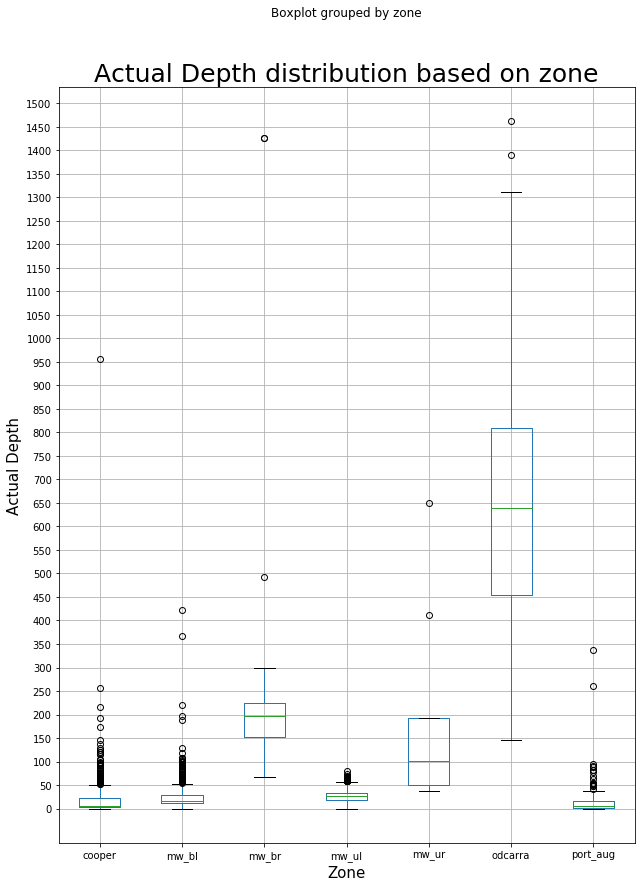

In [88]:
dist_df = df[['zone','actual_depth']]
plot = dist_df.boxplot(by='zone',figsize=(10,14),grid=True)
plot.set_title('Actual Depth distribution based on zone', fontdict={'fontsize': 25})
plot.set_xlabel('Zone', fontsize=15)
plt.yticks(range(0,1550,50))
plot.set_ylabel('Actual Depth', fontsize=15)


While there are many rows of data that lie out of IQR for each zone, only the singificant outliers are removed for the dataset. As the sample size is very small as compared to the features, it is ensured that dimensionality is not further increased in the cleaning process.

Only 19 rows will be removed in the cleaning process, done below:

In [89]:
df = df[((df.zone == 'cooper')  &   (df.actual_depth < 150)) | (df.zone != 'cooper')]
df = df[((df.zone == 'mw_bl')   &   (df.actual_depth < 150)) | (df.zone != 'mw_bl') ]
df = df[((df.zone == 'mw_br')   &   (df.actual_depth < 350)) | (df.zone != 'mw_br')]
df = df[((df.zone == 'mw_ur')   &   (df.actual_depth < 350)) | (df.zone != 'mw_ur')]
df = df[((df.zone == 'odcarra') &   (df.actual_depth < 1350))| (df.zone != 'odcarra')]
df = df[((df.zone == 'port_aug')&   (df.actual_depth < 200)) | (df.zone != 'port_aug')]
df.shape

(1758, 559)

Checking for columns woth non-numerical datatypes.

In [90]:
df.select_dtypes(exclude='float')

,geometry,zone
0,POINT (134.155953163 -29.945266969),cooper
1,POINT (134.392053039 -29.663745938),cooper
2,POINT (134.366706477 -29.54774911700001),cooper
3,POINT (134.478686025 -29.254672033),cooper
5,POINT (134.71227769 -29.725232542),cooper
...,...,...
1772,POINT (137.389625133 -32.439371012),port_aug
1773,POINT (137.375741045 -32.460302175),port_aug
1774,POINT (137.314877602 -32.436961221),port_aug
1775,POINT (137.092763929 -31.088562804),odcarra


It can be observed that zone and geometry are the only two columns with non-numerical values. 
* Zone: Contains categorical variables
    * solution: Each category would be given a unique integer value.
    
    
* Geometry: Contains X and y coordinates of the location of the drillhole.
    * solution: Each coordinate would be extracted and saved in individual columns. Original geometry column will be deleted.

    
  

In [91]:
#Replacing the zone names with integer values
zone_dict = {'cooper':1,'mw_bl':2,'mw_ul':3,'mw_br':4,'odcarra':5,'port_aug':6,'mw_ur':7}
df.zone = [zone_dict[zone_name] for zone_name in df.zone]
df['zone'] = df['zone'].astype(int) # changing the datatype to int

#Splitting the coordinates
df.insert(2,'x_coordinate',df.geometry.str.split(expand=True,)[1].str.strip('(')) #adding new column with x coordinate values
df.insert(3,'y_coordinate',df.geometry.str.split(expand=True,)[2].str.strip(')')) #adding new column with y coordinate values

#Saving both columns as float datatype
df['x_coordinate'] = df['x_coordinate'].astype(float) 
df['y_coordinate'] = df['y_coordinate'].astype(float)

#deleting the geometry column
del df['geometry'] #removing the geometry column

Statistical Aggregation such as min, max, median and mean are used for different km ranges for many features in this data. The code below finds the root features present in the data without any aggregations. 



In [92]:
# to find root reatures with no aggregation
root_features = []
for item in df.columns:
    if 'min' not in str(item):
        if 'max' not in str(item):
            if 'mean' not in str(item):
                if 'median' not in str(item):
                    root_features.append(str(item))

Following are the root features in the data

In [93]:
root_features

['collar_id',
 'actual_depth',
 'x_coordinate',
 'y_coordinate',
 'zone',
 'TMI_pointval',
 'TMI_VRTP_pointval',
 'TMI_VRTP_1VD_pointval',
 'LP800_pointval',
 'LP800_AS_pointval',
 'LP800_VRTP_pointval',
 'LP800_VRTP_1VD_pointval',
 'LP800_VRTP_2VD_pointval',
 'LP800_VRTP_TILT_pointval',
 'LP800_VRTP_AGC_pointval',
 'GRAV_pointval',
 'GRAV_1VD_pointval',
 'TMI_VRTP_PSDGRAV_ERS_pointval',
 'TMI_VRTP_UC1000_ERS_pointval',
 'TMI_VRTP_UC1000_RES_ERS_pointval']

To check if collinearity exist amongst the data, a heatmap of correlation matrix is plotted with all <b>root features. </b>

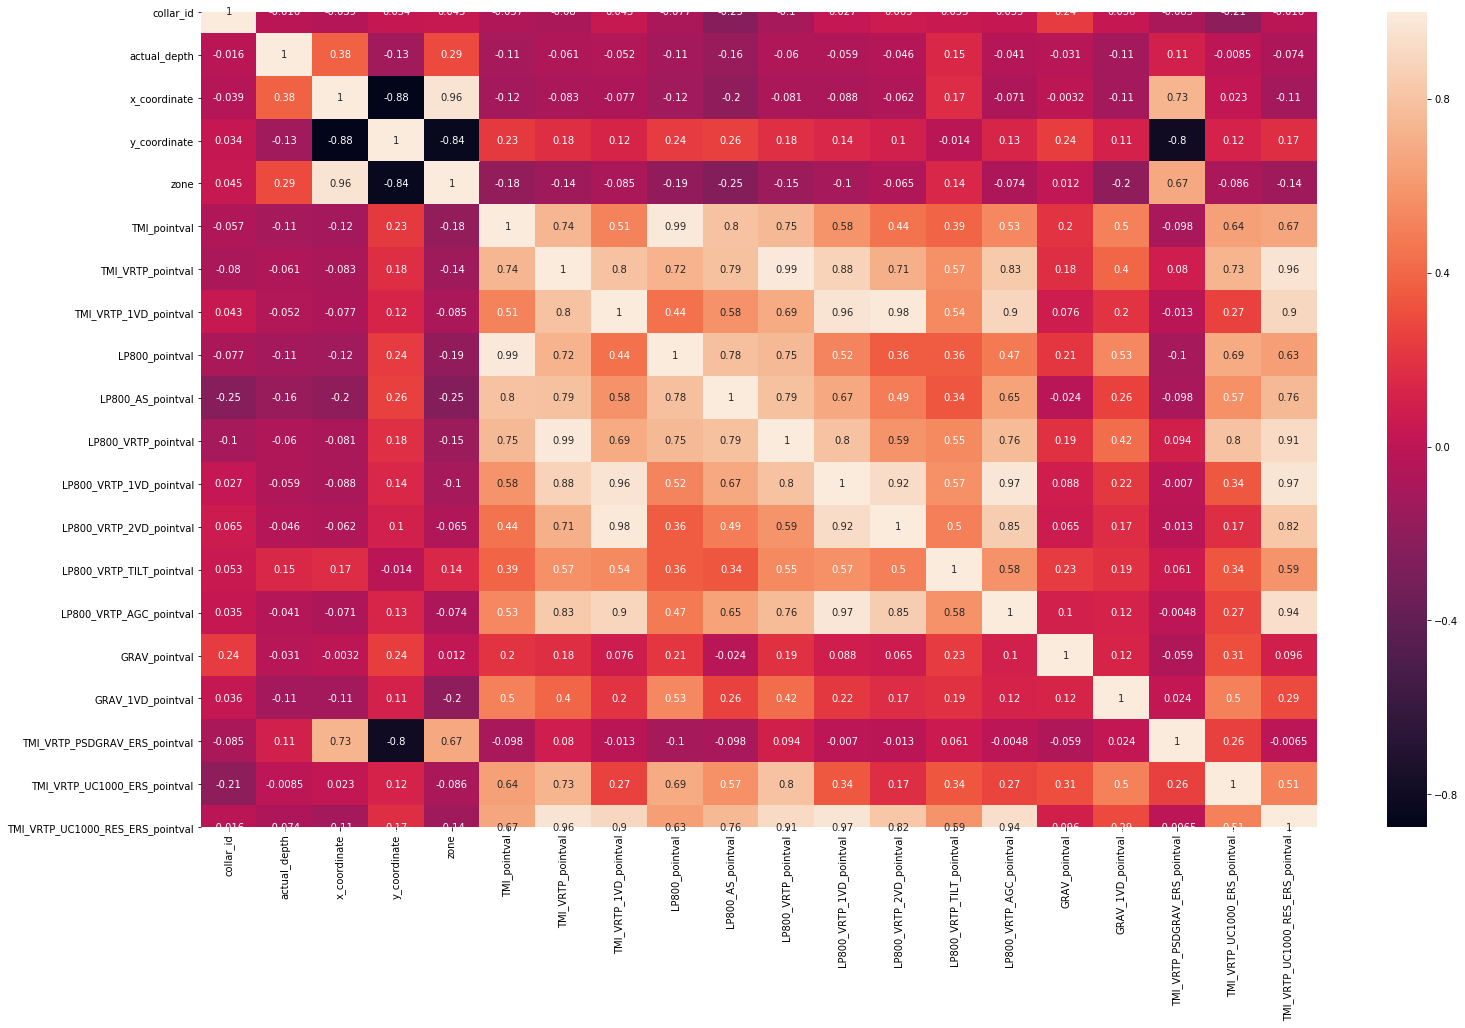

In [94]:
def plot_corr_matrix(a_list):
    df_2 = df[a_list].round(2)
    df_2['actual_depth']  = df.actual_depth
    corr_matrix = df_2.corr()
    plt.figure(figsize=(25, 15))
    sn.heatmap(corr_matrix, annot=True)

plot_corr_matrix(root_features)


It can be observed above that some collinearity exist within the root features. Especially, strong collinearity can be observed in the centre of the heatmap matrix above. 

Let's see if some collinearity exist when a feature is aggregated. Correlation matrix for aggregations of TMI_pointval over different distances are plotted below.

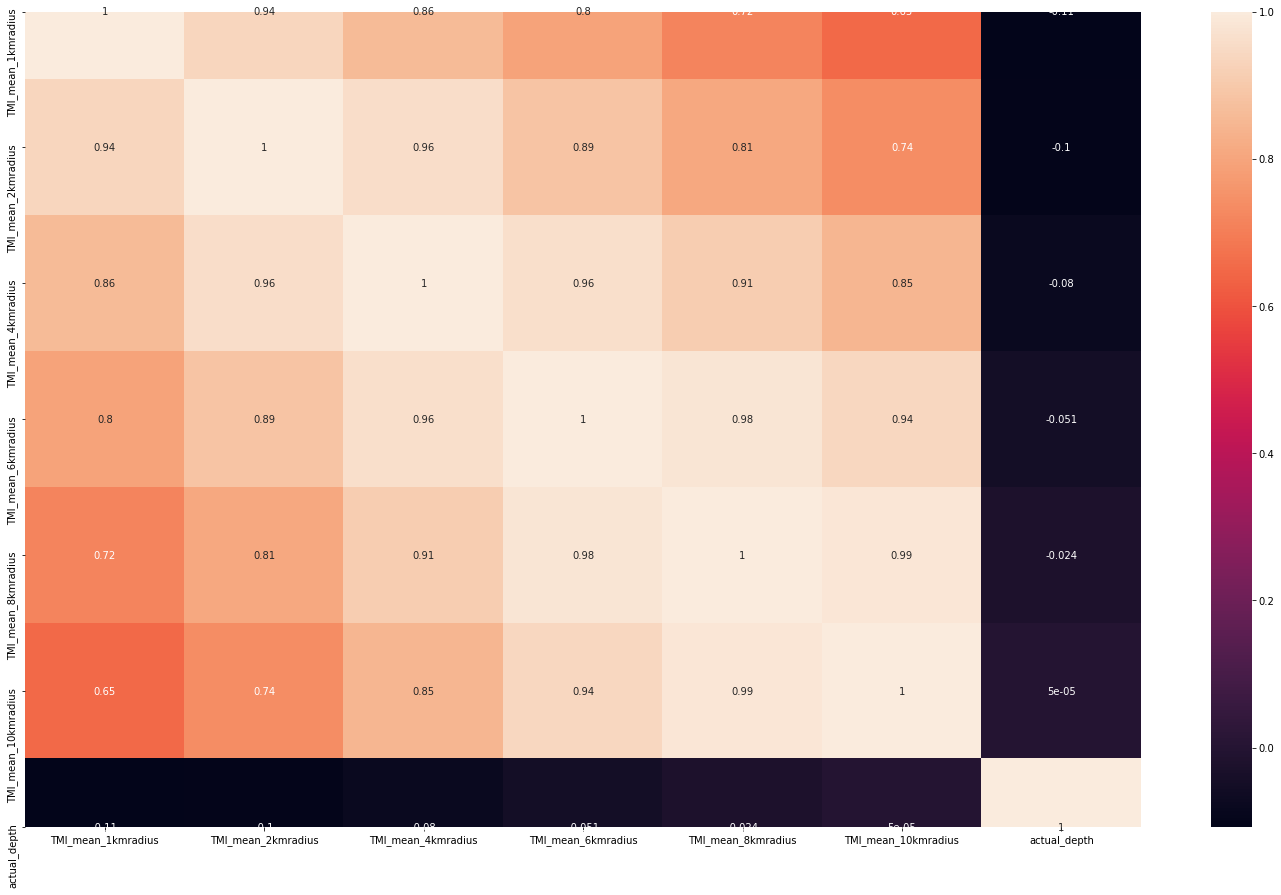

In [95]:
x_1 = []
for item in df.columns:
    if('TMI' in str(item)) & ('VRTP' not in str(item)) & ('mean' in str(item)) :
        x_1.append(item)
plot_corr_matrix(x_1)

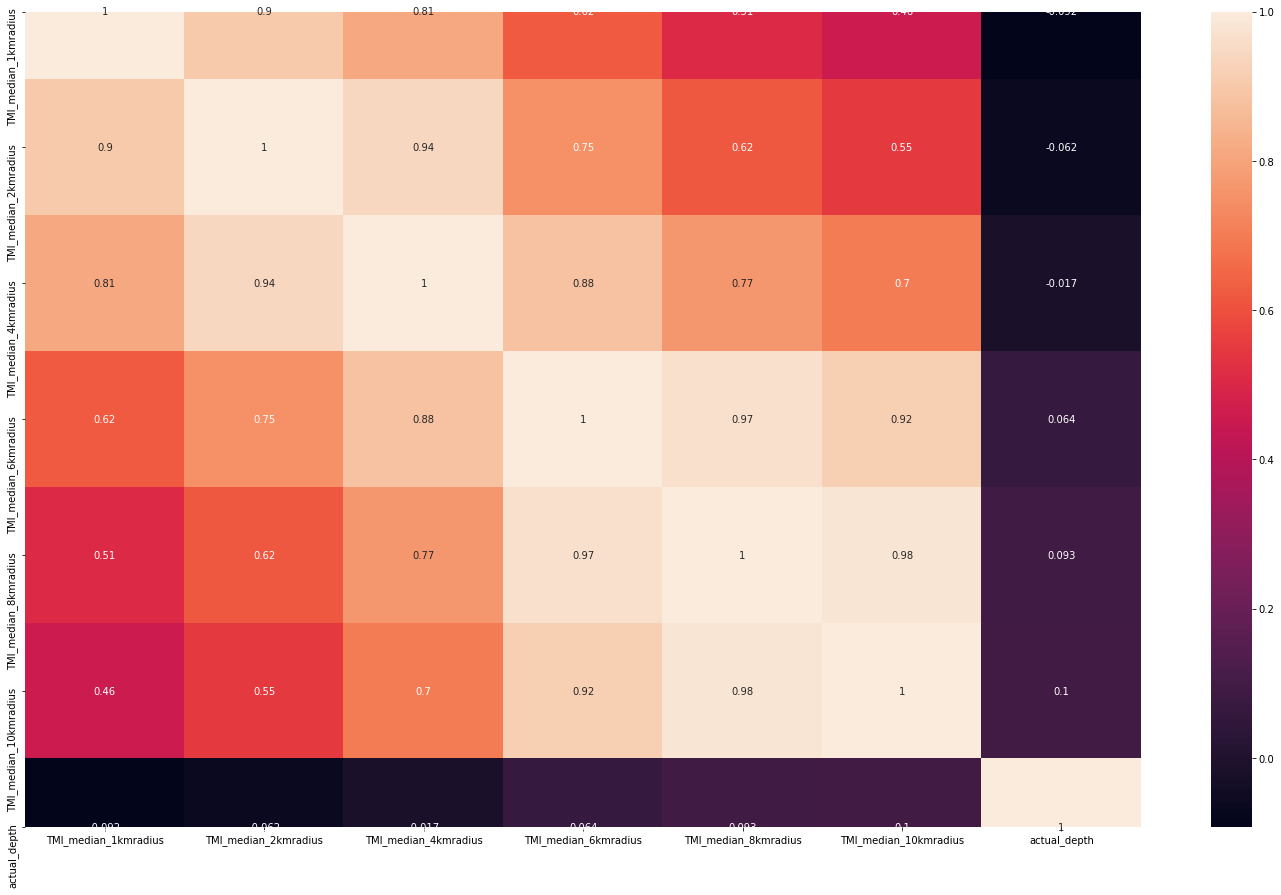

In [96]:
x_1 = []
for item in df.columns:
    if('TMI' in str(item)) & ('VRTP' not in str(item)) & ('median' in str(item)) :
        x_1.append(item)
plot_corr_matrix(x_1)

It be observed that the all the features derived from TMI_pointval are highly correlated. Check if aggregations of TMI_VRTP_UC1000_ERS show the same characteristics.

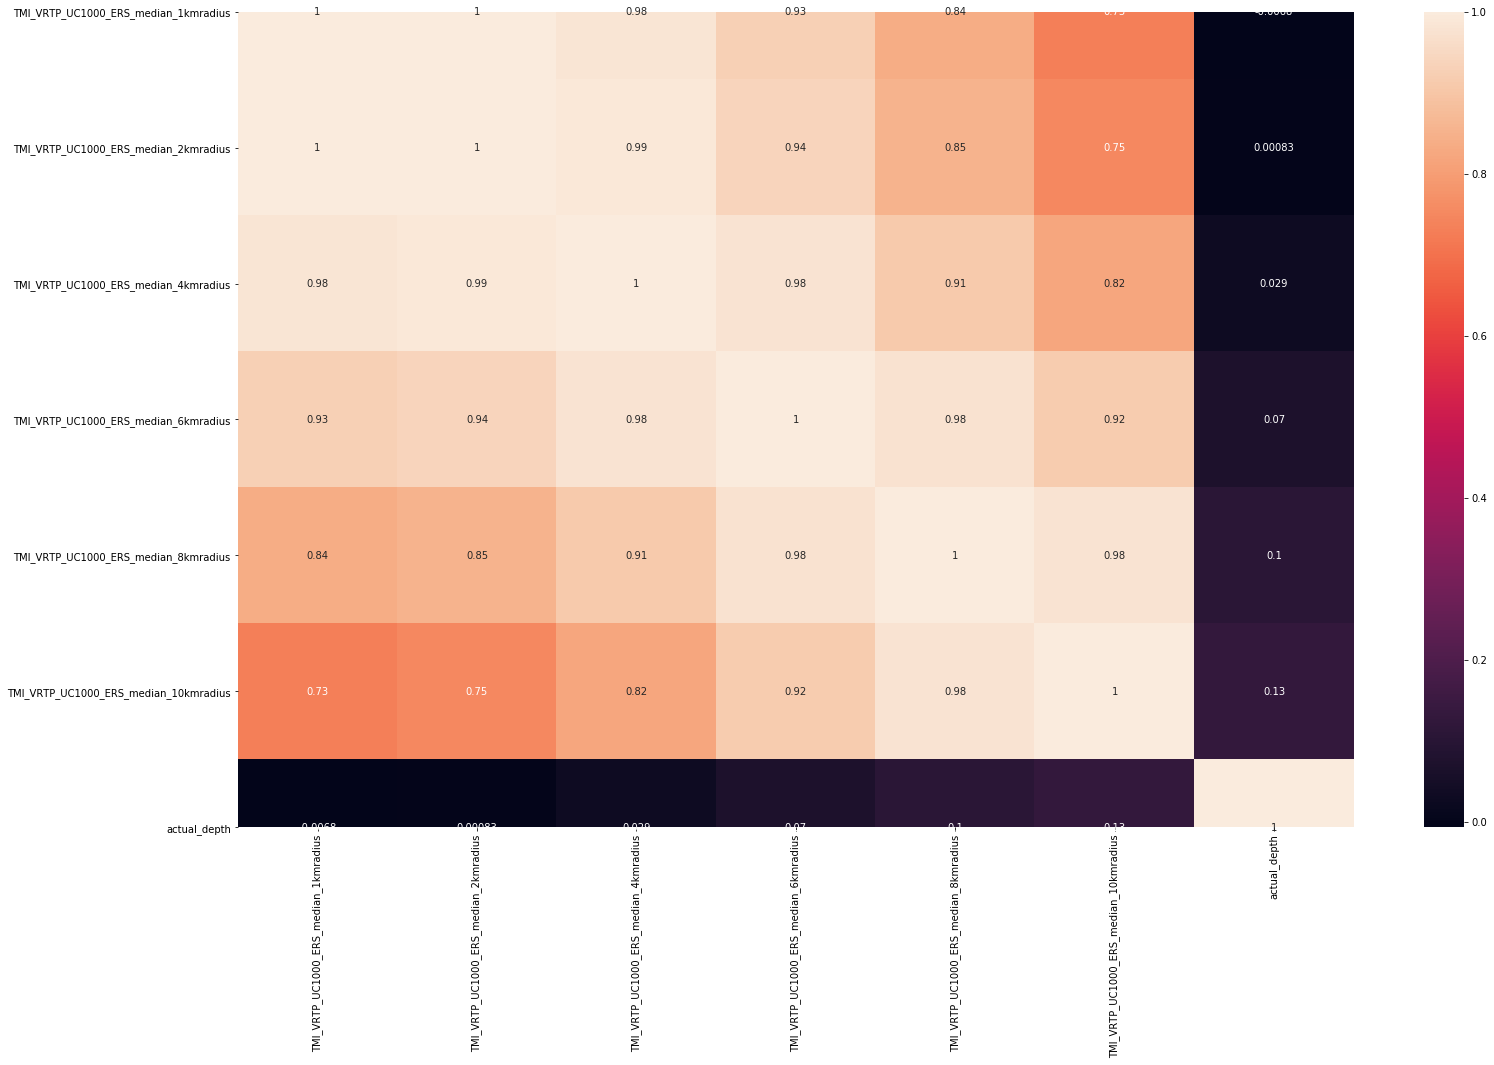

In [97]:
x_1 = []
for item in df.columns:
    if('TMI_VRTP_UC1000_ERS' in str(item)) & ('median' in str(item)) :
        x_1.append(item)
plot_corr_matrix(x_1)

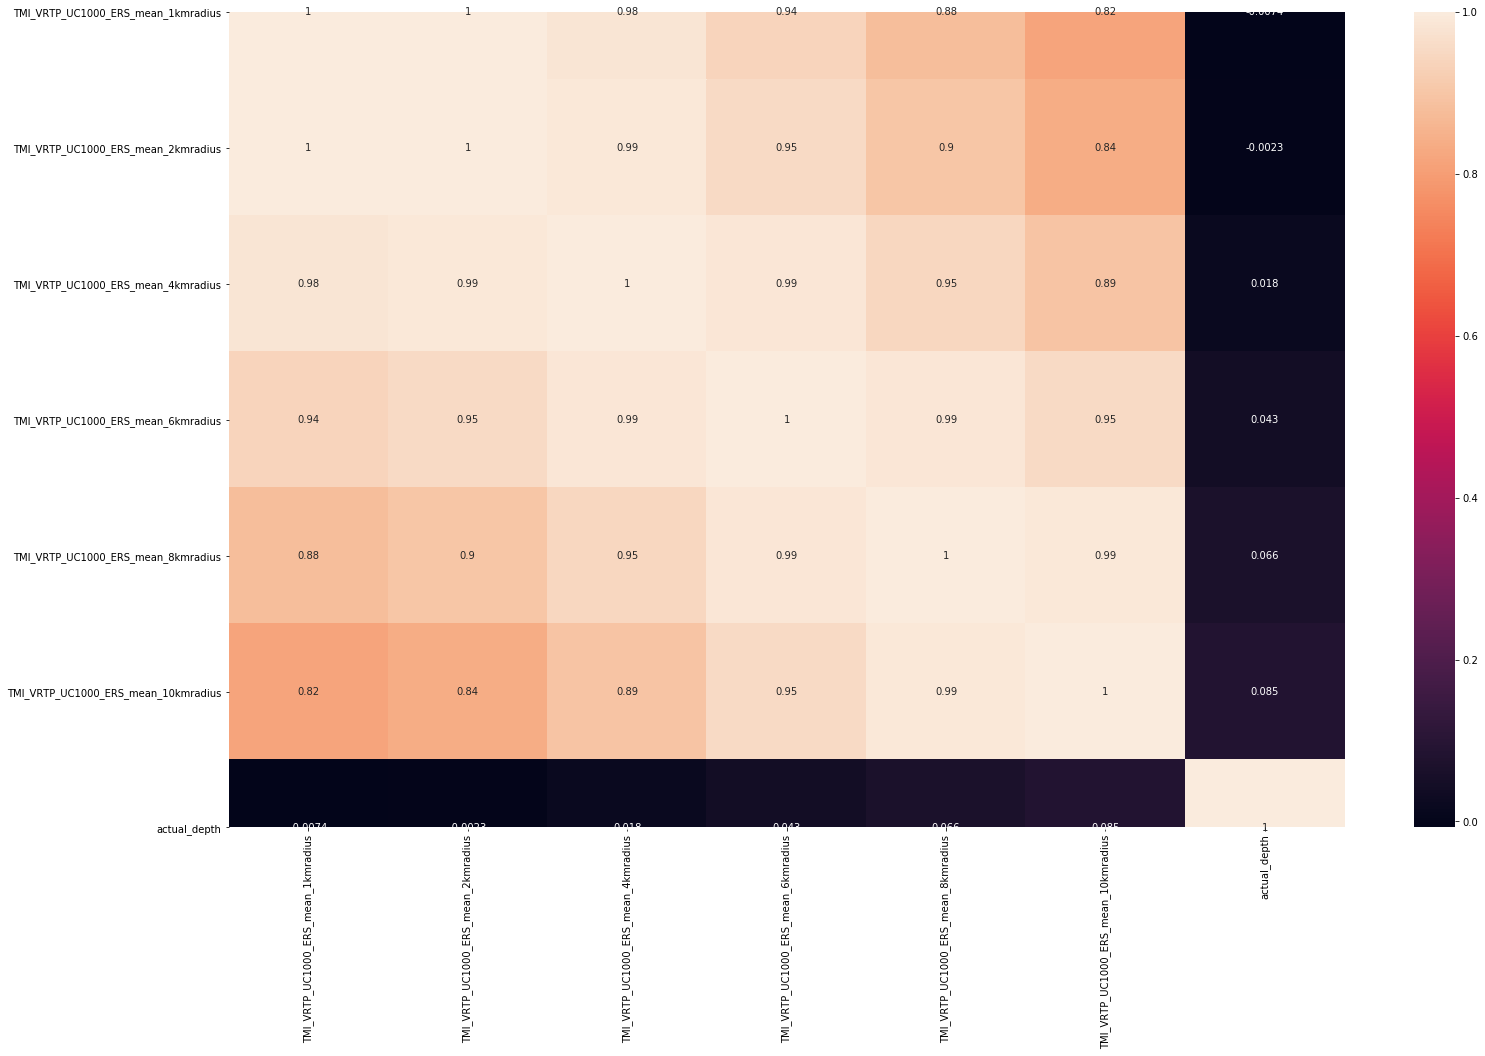

In [98]:
x_1 = []
for item in df.columns:
    if('TMI_VRTP_UC1000_ERS' in str(item)) & ('mean' in str(item)) :
        x_1.append(item)
plot_corr_matrix(x_1)

It is clear from above plots that most of the features are highly correlated and would lead to multicollinearity if included in the model. Hence, feature reduction is performed in the next section to check for these features and remove them from the dataset.

## 2. Feature Reduction

This is one of the most important step in this challenge. Two methods are used to perform feature reduction independently and the feature that are selected in both the methods are finally selected for further analysis. 

The two methods used are:

* RFECV: Recursive feature elimination with cross validation build multiple models to predict the target variable including different number of features from the dataset. The subset of features which result in the most accurate model are then selected as the most important features.

* Pearson Correlation: Pearson correlation is calculated between each feature and the target variable. Then, the most relavent features are returned.



<b>But, before these methods are implemented, it is important to remove the features which correlated with each other.</b> As a feature might have significant correlation with the target variable but might have stronger correlaton to some other feature which would lead to multicolliarity in the model.





Finding features with correlation of more than 0.80 with other features.

In [99]:
correlated_features = set() #set is used to ensure that each column name is unique
correlation_matrix = df.drop('actual_depth', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

406 features were found with collinearity more than 0.8.

In [100]:
correlated_features = list(correlated_features)
len(correlated_features)

406

It was observed in the exploration stage that <b>a root feature with same aggregation over different distances had very high correlation with each other</b>. Hence, to group the correlated features obtained from above into group of features which belong to the same root feature and aggregation, the following steps were performed:

* A dictionory is used to add all the feature with same statistical aggregation as a list to a specific key in the dictionary.
* The features present in each key are then checked for similarity using string matching to get list with sublist of root_features with same aggreagation.
* The feature with minimum distance aggregation is selected from each group. As, it is assumed that the feature with smaller distance would have less noise in the data.

The code below builds a dictionary to group features with same statisical aggregations.

In [101]:
aggregation_group = {'min':[],'max':[],'median':[],'mean':[],'mindist':[],'maxdist':[]}

for i in range(len(correlated_features)):
    if ('min' in correlated_features[i]) & ('dist' not in correlated_features[i]):
        aggregation_group['min'].append(correlated_features[i])
        
    elif ('max' in correlated_features[i]) & ('dist' not in correlated_features[i]):
        aggregation_group['max'].append(correlated_features[i])
        
    elif 'median' in correlated_features[i]:
        aggregation_group['median'].append(correlated_features[i]) 
        
    elif 'mean' in correlated_features[i]:
        aggregation_group['mean'].append(correlated_features[i])
        
    elif 'max_dist_' in correlated_features[i]:
        aggregation_group['maxdist'].append(correlated_features[i])
        
    elif 'min_dist_' in correlated_features[i]:
        aggregation_group['mindist'].append(correlated_features[i])

The dictionary formed above is shown below.

In [102]:
aggregation_group

{'min': ['TMI_VRTP_PSDGRAV_ERS_min_2kmradius',
  'GRAV_1VD_min_2kmradius',
  'LP800_VRTP_min_8kmradius',
  'LP800_min_1kmradius',
  'TMI_VRTP_min_6kmradius',
  'TMI_VRTP_PSDGRAV_ERS_min_8kmradius',
  'LP800_min_6kmradius',
  'TMI_VRTP_PSDGRAV_ERS_min_6kmradius',
  'LP800_VRTP_min_6kmradius',
  'TMI_VRTP_1VD_min_10kmradius',
  'TMI_VRTP_UC1000_ERS_min_4kmradius',
  'GRAV_min_4kmradius',
  'LP800_AS_min_10kmradius',
  'TMI_VRTP_UC1000_RES_ERS_min_6kmradius',
  'TMI_VRTP_min_4kmradius',
  'LP800_min_10kmradius',
  'TMI_VRTP_1VD_min_4kmradius',
  'LP800_VRTP_2VD_min_10kmradius',
  'LP800_VRTP_min_4kmradius',
  'TMI_VRTP_UC1000_ERS_min_8kmradius',
  'LP800_VRTP_AGC_min_8kmradius',
  'LP800_VRTP_2VD_min_4kmradius',
  'LP800_min_2kmradius',
  'LP800_VRTP_1VD_min_2kmradius',
  'LP800_AS_min_2kmradius',
  'TMI_VRTP_1VD_min_1kmradius',
  'LP800_VRTP_AGC_min_6kmradius',
  'LP800_VRTP_AGC_min_4kmradius',
  'TMI_VRTP_UC1000_RES_ERS_min_1kmradius',
  'TMI_VRTP_PSDGRAV_ERS_min_10kmradius',
  'LP800_V

The code below group the features with same root feature and statistical aggregation in each key of the dictionary formed above. 

In [103]:
collinear_grouped = list()

for group in aggregation_group:
    for name in aggregation_group[group]:
        for g in collinear_grouped:
            if all(fuzz.ratio(name, w) > 92 for w in g):
                g.append(name)
                break
        else:
            collinear_grouped.append([name, ])

The features grouped by same root feature and statistical aggregation are shown below.

In [104]:
collinear_grouped[:10]

[['TMI_VRTP_PSDGRAV_ERS_min_2kmradius',
  'TMI_VRTP_PSDGRAV_ERS_min_8kmradius',
  'TMI_VRTP_PSDGRAV_ERS_min_6kmradius',
  'TMI_VRTP_PSDGRAV_ERS_min_10kmradius',
  'TMI_VRTP_PSDGRAV_ERS_min_1kmradius',
  'TMI_VRTP_PSDGRAV_ERS_min_4kmradius',
  'TMI_VRTP_PSDGRAV_ERS_median_1kmradius',
  'TMI_VRTP_PSDGRAV_ERS_mean_1kmradius'],
 ['GRAV_1VD_min_2kmradius',
  'GRAV_1VD_min_6kmradius',
  'GRAV_1VD_min_10kmradius',
  'GRAV_1VD_min_8kmradius',
  'GRAV_1VD_min_4kmradius'],
 ['LP800_VRTP_min_8kmradius',
  'LP800_VRTP_min_6kmradius',
  'LP800_VRTP_min_4kmradius',
  'LP800_VRTP_min_1kmradius',
  'LP800_VRTP_min_2kmradius',
  'LP800_VRTP_min_10kmradius'],
 ['LP800_min_1kmradius',
  'LP800_min_6kmradius',
  'LP800_min_2kmradius',
  'LP800_min_4kmradius',
  'LP800_min_8kmradius'],
 ['TMI_VRTP_min_6kmradius',
  'TMI_VRTP_min_4kmradius',
  'TMI_VRTP_min_8kmradius',
  'TMI_VRTP_min_10kmradius'],
 ['TMI_VRTP_1VD_min_10kmradius',
  'TMI_VRTP_1VD_min_4kmradius',
  'TMI_VRTP_1VD_min_1kmradius',
  'TMI_VRTP_1VD_min_6kmradius',
  'TMI_VRTP_1VD_min_8kmradius',
  'TMI_VRTP_1VD_min_2kmradius'],
 ['TMI_VRTP_UC1000_ERS_min_4kmradius',
  'TMI_VRTP_UC1000_ERS_min_8kmradius',
  'TMI_VRTP_UC1000_ERS_min_1kmradius',
  'TMI_VRTP_UC1000_ERS_min_6kmradius',
  'TMI_VRTP_UC1000_ERS_min_2kmradius',
  'TMI_VRTP_UC1000_ERS_min_10kmradius',
  'TMI_VRTP_UC1000_ERS_median_1kmradius',
  'TMI_VRTP_UC1000_ERS_mean_1kmradius'],
 ['GRAV_min_4kmradius',
  'GRAV_min_2kmradius',
  'GRAV_min_6kmradius',
  'GRAV_min_8kmradius',
  'GRAV_min_1kmradius'],
 ['LP800_AS_min_10kmradius', 'LP800_min_10kmradius'],
 ['TMI_VRTP_UC1000_RES_ERS_min_6kmradius',
  'TMI_VRTP_UC1000_RES_ERS_min_1kmradius',
  'TMI_VRTP_UC1000_RES_ERS_min_8kmradius',
  'TMI_VRTP_UC1000_RES_ERS_min_2kmradius',
  'TMI_VRTP_UC1000_RES_ERS_min_4kmradius',
  'TMI_VRTP_UC1000_RES_ERS_min_10kmradius',
  'TMI_VRTP_UC1000_RES_ERS_median_1kmradius',
  'TMI_VRTP_UC1000_RES_ERS_mean_1kmradius']]

The code below slects the feature with minimum distance in each group formed above.

In [105]:
selected_features = []
for i in range(len(collinear_grouped)):
    min_range = 11
    selected = ''
    for j in range(len(collinear_grouped[i])):
        
        if int(collinear_grouped[i][j].split('_')[-1:][0].split('k')[0]) < min_range:
            selected = collinear_grouped[i][j]
            min_range = int(collinear_grouped[i][j].split('_')[-1:][0].split('k')[0])
    
    selected_features.append(selected)

In [106]:
len(selected_features)

85

The code below drops all the columns that were not selected in the above steps from the dataframe.

In [107]:
for item in correlated_features:
    if item not in selected_features:
        df = df.drop(item,axis=1)


The data is free from correlated features. The steps below are now used to find the features that are important to predict the actual_depth.


In [108]:
#seperating the features and target variables
X = df.drop(['actual_depth','collar_id'], axis=1) #removing id aand target variable.

target = df['actual_depth'] #target variable.

The code below calculates pearson correlation between each feature and taregt variable. It then returns 25 most important features based on those values.



In [109]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [110]:
cor_support, cor_feature = cor_selector(df.drop(['actual_depth','collar_id'], axis=1), df.actual_depth,25)
print(str(len(cor_feature)), 'selected features')

25 selected features


The code below performs RFECV with random forest regressor. 5 fold cross validation is performed with a step size of 20 which means that 20 least important features are removed after each recursion.

In [111]:
rfecv = RFECV(estimator=RandomForestRegressor(), step=20, cv=5,min_features_to_select = 10 , scoring='r2')
rfecv.fit(X, target)

RFECV(cv=5,
      estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators='warn', n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False),
      min_features_to_select=10, n_jobs=None, scoring='r2', step=20, verbose=0)

In [112]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 10


The plot below shows the cross-validation score for every model built in the process of RFECV.

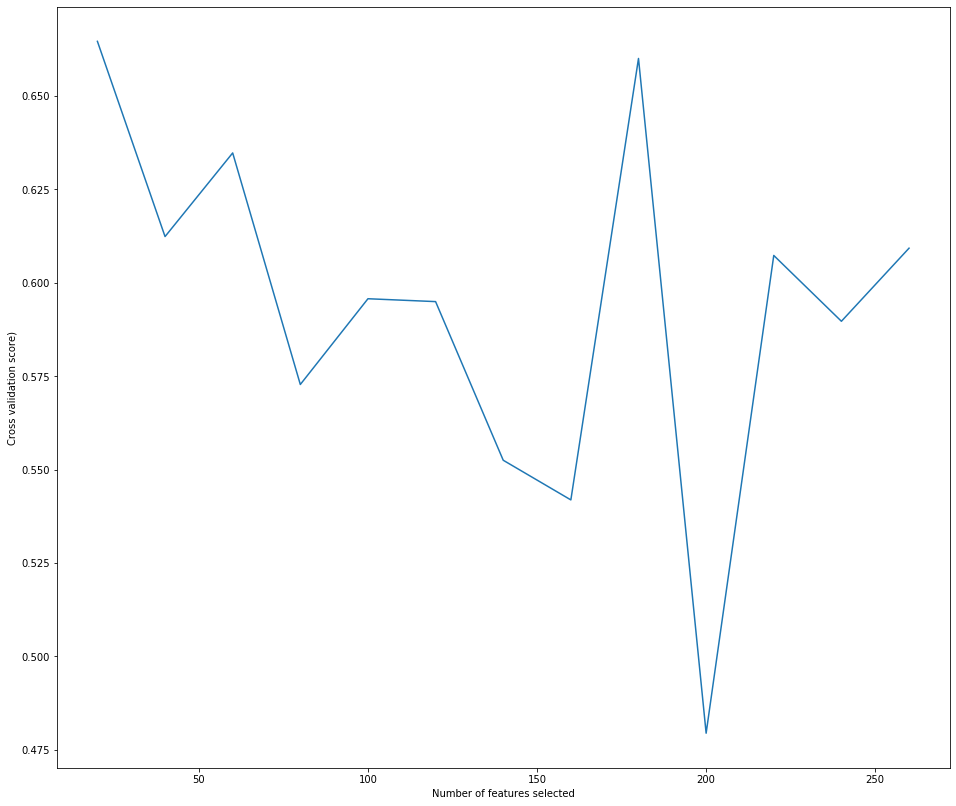

In [113]:
plt.figure(figsize=(16, 14))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score)")
plt.plot(range(20, (len(rfecv.grid_scores_) + 1)*20,20), rfecv.grid_scores_)
plt.show()

Creating a dataframe with top 15 important features. As using all feature leads to overfitting and reduces the accuracy of the model.

In [114]:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)
dset = dset[:15]
dset

,attr,importance
9,LP800_VRTP_2VD_max_10kmradius,0.693853
6,LP800_VRTP_TILT_min_4kmradius,0.076678
0,x_coordinate,0.062552
2,LP800_max_1kmradius,0.048523
1,TMI_max_1kmradius,0.033750
3,GRAV_max_1kmradius,0.032197
5,GRAV_min_dist_2kmradius,0.015581
4,GRAV_1VD_median_1kmradius,0.015004
7,LP800_VRTP_TILT_min_dist_6kmradius,0.012008
8,TMI_mean_10kmradius,0.009853


Selecting the features common in both the results from RFECV and Pearson Correlation feature selction.

In [115]:
final_selected_features = []
for item in list(dset.attr):
    if item in cor_feature :
        final_selected_features.append(item)

In [116]:
print('Number of features selected for modelling: {}'.format(len(final_selected_features)))

Number of features selected for modelling: 3


Removing all columns not present in the finally selected features and the target variable i.e. actual_depth added to the dataframe. This final dataframe will now be sued for modelling.

In [117]:
final_selected_features.append('actual_depth')
df.drop(df.columns.difference(final_selected_features), 1, inplace=True)
df


,actual_depth,x_coordinate,LP800_VRTP_TILT_min_4kmradius,LP800_VRTP_2VD_max_10kmradius
0,37.999959,134.155953,-88.148224,0.016758
1,3.999978,134.392053,-89.564163,0.015804
2,24.000040,134.366706,-89.751022,0.012402
3,37.999999,134.478686,-89.782616,0.092077
5,2.000001,134.712278,-87.968948,0.004872
...,...,...,...,...
1772,29.999797,137.389625,-88.342674,0.006531
1773,4.999970,137.375741,-88.405632,0.006682
1774,1.000123,137.314878,-87.759743,0.007781
1775,941.999881,137.092764,-63.504414,0.004894


## Modelling using Grid Search cross validation for parameter optimisation: 

In order to ensure that the target variable is equally likely to occur in test and train data, the target variable is divided into 6 bins and stratified test train split is then performed.

In [118]:
bins = np.linspace(0, 1777, 6) #Dividing 1777 into 6 bins


y_binned = np.digitize(df.actual_depth, bins) # Dividing the actual_depth column into 6 bins

#Stratifief test train split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.actual_depth,test_size=0.25,stratify=y_binned, random_state=0)

Random Forest Regressor with Grid Search Cross Validation(5 fold) to find the best set of parameters to find the best fit for the model. 

In [119]:

Random_forest = Pipeline([('randomforest', RandomForestRegressor())])

#Parameters to be used for grid search cross validation.
grid_param = {
    'randomforest__n_estimators': [6, 10, 14, 18, 22, 26],   
    'randomforest__max_depth': list(range(2,10,1)),
    'randomforest__min_samples_split': np.linspace(0.1, 0.5, 5, endpoint=True),
}


grid_rf = GridSearchCV(estimator=Random_forest,
                     param_grid=grid_param,
                     cv=5,
                     n_jobs=-1)
# Fitting the values
rf_model = grid_rf.fit(x_train, y_train)

#Printing the best parameters 
print(rf_model.best_params_)




{'randomforest__max_depth': 9, 'randomforest__min_samples_split': 0.1, 'randomforest__n_estimators': 22}


Calculating the r squared value for predicited and actual values.

In [120]:
print('Number of features selected for modelling: {}'.format(r2_score(y_test, rf_model.predict(x_test))))


Number of features selected for modelling: 0.795369903300108


## Understanding the model:

The R squared value is satisfactory, but there is a scope for further improvement. SHAP values are used to view the contribution of each feature to the model. The two graphs visualises the contribution fo each feature. 

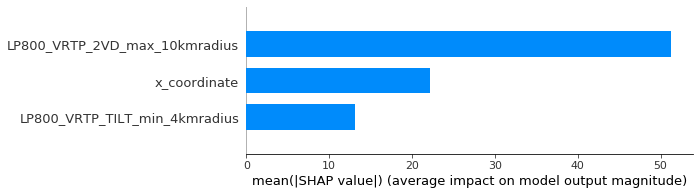

In [121]:
shap_values = shap.TreeExplainer(RandomForestRegressor(max_depth=6, min_samples_split=3, n_estimators=14).fit(x_train,y_train)).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

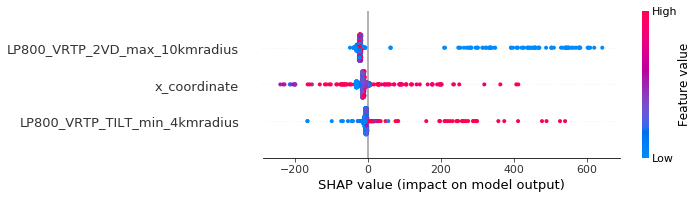

In [122]:
shap.summary_plot(shap_values, x_train)

Now, a Random Forest Regressor is fit using the top 5 features with highest SHAP values and the R sqaured value is shown below. The r sqaure value is much more improved now. 

## Final Model:

In [123]:
model = (RandomForestRegressor(max_depth=6, min_samples_split=3, n_estimators=14).fit(x_train[list(x_train.columns[np.argsort(np.abs(shap_values).mean(0))][-5:])],y_train))

In [124]:
r2_score(y_test, model.predict(x_test[list(x_train.columns[np.argsort(np.abs(shap_values).mean(0))][-5:])]))


0.9015419585558881

Hence, an improved model is obtained and the following features are the most important in this model.

In [125]:
list(x_train.columns[np.argsort(np.abs(shap_values).mean(0))][-5:])

['LP800_VRTP_TILT_min_4kmradius',
 'x_coordinate',
 'LP800_VRTP_2VD_max_10kmradius']